In [2]:
import pandas as pd
file_path = 'elonmusk.csv'
Data = pd.read_csv(file_path, parse_dates=['Datetime'], index_col='Datetime')

In [21]:
len(Data)

24450

In [4]:
Data.head(10)

,Tweet Id,Text,Username
Datetime,,,
2023-06-29 16:20:19+00:00,1674452749378002945,@mwseibel Yup,elonmusk
2023-06-29 15:53:52+00:00,1674446089179766789,@TitterDaily True,elonmusk
2023-06-29 03:46:37+00:00,1674263071337111552,@paulg Generational trauma. An example of why ...,elonmusk
2023-06-29 01:19:59+00:00,1674226170488057856,Improved longform posts,elonmusk
2023-06-28 18:05:58+00:00,1674116945808068608,@BillyM2k Best protip ever,elonmusk
2023-06-28 17:04:07+00:00,1674101384390782976,Thank you for the kind words,elonmusk
2023-06-28 16:33:15+00:00,1674093615315062784,@zerohedge 🧐,elonmusk
2023-06-28 08:49:05+00:00,1673976802103148544,42+10,elonmusk
2023-06-28 08:48:09+00:00,1673976566567804928,@nytimes !!,elonmusk


Tweets appear with emoticons, spaces, #, @.\
I'm going to apply a minimal cleaning.

# Cleaning texts

In [3]:
import re

def clean_for_sentiment(text:str)->str:
    text = str(text)
    #1 every url become URL
    text = re.sub(r'https?://\S+', 'URL', text)
    #2 hashtag: romeve only the sign #
    text = re.sub(r'#(\w+)', r'\1', text)
    #3 tags: remove only @
    text = re.sub(r'@(\w+)', r'\1', text)
    #4 remove multiple spaces, and initial spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [5]:
Data['clean_text'] = Data['Text'].apply(clean_for_sentiment)

In [7]:
Data['date_only'] = Data.index.date

In [9]:
Data[['date_only']]

,date_only
Datetime,
2023-06-29 16:20:19+00:00,2023-06-29
2023-06-29 15:53:52+00:00,2023-06-29
2023-06-29 03:46:37+00:00,2023-06-29
2023-06-29 01:19:59+00:00,2023-06-29
2023-06-28 18:05:58+00:00,2023-06-28
...,...
2011-12-03 08:22:07+00:00,2011-12-03
2011-12-03 08:20:28+00:00,2011-12-03
2011-12-01 10:29:04+00:00,2011-12-01


# Quick look at the amount of tweet per day

In [11]:
tweet_per_day = Data.groupby('date_only').agg({'Text':'count'})
tweet_per_day

,Text
date_only,
2010-06-04,1
2011-12-01,2
2011-12-03,2
2011-12-04,1
2011-12-21,7
...,...
2023-06-25,19
2023-06-26,25
2023-06-27,30


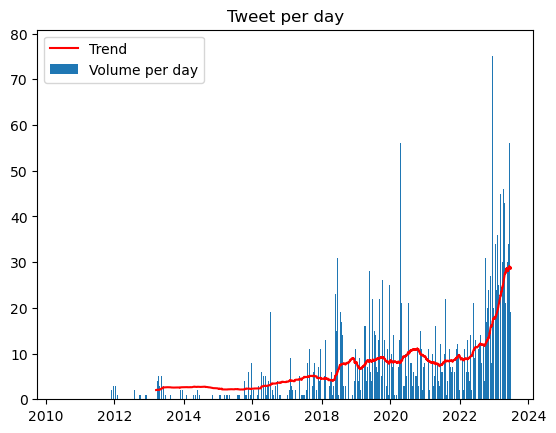

In [13]:
import matplotlib.pyplot as plt

plt.bar(tweet_per_day.index,tweet_per_day['Text'], label='Volume per day')
MM_180 = tweet_per_day['Text'].rolling(window=180).mean()
plt.plot(MM_180, color = 'r', label = 'Trend')
plt.title('Tweet per day')
plt.legend(loc='best')

# Sentiment Analysis using Gemini API

In [24]:
pip install -q -U google-generativeai

Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [15]:
import google.generativeai as genai

C:\Users\carlo\anaconda3\envs\tf-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\carlo\AppData\Local\Temp\ipykernel_17560\613638648.py:1: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  import google.generativeai as genai


In [17]:
genai.configure(api_key='...MyKeys...')

In [105]:
model = genai.GenerativeModel('gemini-2.5-flash')
response = model.generate_content("""
Analyze the sentiment of the following tweet.

Return ONLY raw JSON.
Do NOT use markdown.
Do NOT use ``` fences.
Do NOT add text before or after.

The values must be floating point probabilities between 0 and 1
and must sum to exactly 1.

Required keys:
- negative
- neutral
- positive

Tweet: "Tesla rocks! 🚀💥"
""")
response.text

'{"negative": 0.01, "neutral": 0.01, "positive": 0.98}'

In [107]:
json.loads(response.text)

{'negative': 0.01, 'neutral': 0.01, 'positive': 0.98}

In [19]:
import json
import time
from tqdm import tqdm
import os
import re

# Sentiment function

In [23]:
import json
import re

model = genai.GenerativeModel('gemini-2.5-flash')

FALLBACK = {
    'negative':0.5,
    'neutral':0.0,
    'positive':0.5
}

def get_sentiment(tweet_text:str)->dict:
    try:
        response = model.generate_content(f"""
        Analyze the sentiment of the following tweet.

        Return ONLY raw JSON.
        Do NOT use markdown.
        Do NOT use ``` fences.
        Do NOT add text before or after.

        The values must be floating point probabilities between 0 and 1
        and must sum to exactly 1.

        Required keys:
        - negative
        - neutral
        - positive

        Tweet: """ + tweet_text + """
        """)

        # extract JSON
        match = re.search(r"\{.*\}", response.text, re.S)
        if not match:
            return FALLBACK.copy()
        
        sentiment = json.loads(match.group())

        # validate keys
        keys = {'negative','neutral','positive'}
        if set(sentiment.keys()) != keys:
            return FALLBACK.copy()

        # validate numeric
        if not all(isinstance(v, (int, float)) for v in sentiment.values()):
            return FALLBACK.copy()

        # validate sum > 0
        total = sum(sentiment.values())
        if total <= 0:
            return FALLBACK.copy()

        # normalize
        sentiment = {k: max(0,v/total)  for k,v in sentiment.items()}
        return sentiment

    except Exception:
        return FALLBACK.copy()


# One try

In [22]:
t1 = 'today is a great day'
t2 = 'come on biden! we want free weed'
t3 = 'i crashed with my car'

lista = [t1,t2,t3]
analisi = []

for i in lista:
    risultato = get_sentiment(i)
    analisi.append(risultato)

analisi

[{'negative': 0.02, 'neutral': 0.03, 'positive': 0.95},
 {'negative': 0.45, 'neutral': 0.25, 'positive': 0.3},
 {'negative': 0.99, 'neutral': 0.005, 'positive': 0.005}]

In [29]:
pd.DataFrame(analisi)

,negative,neutral,positive
0,0.01,0.04,0.95
1,0.10,0.20,0.70
2,0.98,0.01,0.01


# Batching
I divide dataframe Data in batches to process data in different times.

In [25]:
import numpy as np
len_Data = len(Data)
print(len_Data)  # 24450
split_ix =np.arange(0 ,len_Data , int(len_Data/24)+1)
split_ix[len(split_ix)-1] = len_Data
print(split_ix)  # [    0  1019  2038  3057  4076  5095  6114  7133  8152  9171 10190 11209
# 12228 13247 14266 15285 16304 17323 18342 19361 20380 21399 22418 24450]

texts = Data['clean_text']
le_date = Data['date_only']

batch =[]
date = []
for n in range(len(split_ix)-1):
    batch.append(texts.iloc[split_ix[n]:split_ix[n+1]])
    date.append(le_date.iloc[split_ix[n]:split_ix[n+1]])


24450
[    0  1019  2038  3057  4076  5095  6114  7133  8152  9171 10190 11209
 12228 13247 14266 15285 16304 17323 18342 19361 20380 21399 22418 24450]


# Processing tweets

In [145]:
import pandas as pd
from tqdm import tqdm  

# text and dates
tweets = batch[0].values.tolist()
dates = date[0].values.tolist()

negative, neutral, positive = [], [], []

for tweet in tqdm(tweets):  
    sentiment = get_sentiment(tweet)  
    negative.append(sentiment["negative"])
    neutral.append(sentiment["neutral"])
    positive.append(sentiment["positive"])

# final DataFrame 
df_sentiment = pd.DataFrame({
    "date": dates,
    "negative": negative,
    "neutral": neutral,
    "positive": positive
})

df_sentiment.to_csv('elon_batch_0.csv', index=False)

100%|████████████████████████████████████████████████████████████████████████████| 1019/1019 [1:03:30<00:00,  3.74s/it]


# Chek the Fallbacks
No costant outputs so there were not significant number of fallbacks.\
Orizontal lines implies fallback in action.

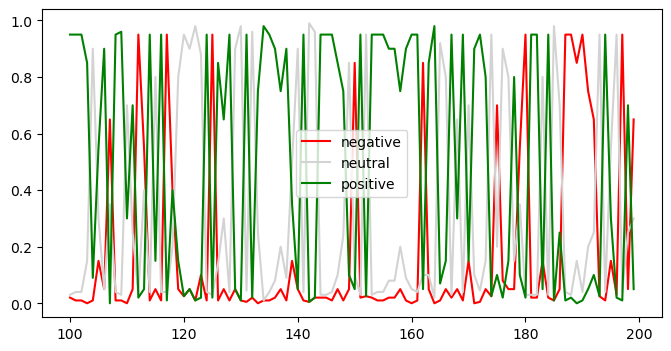

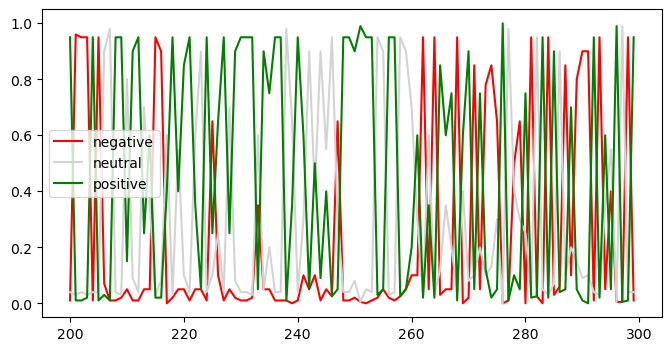

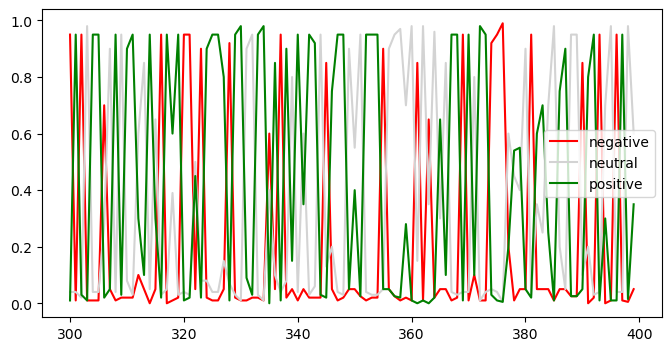

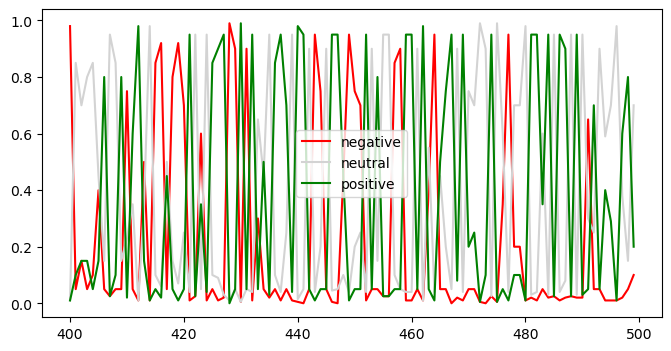

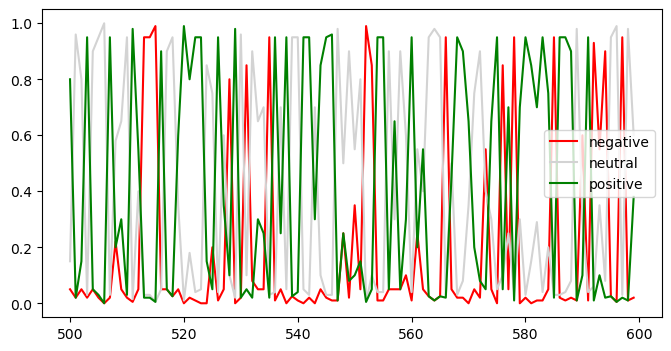

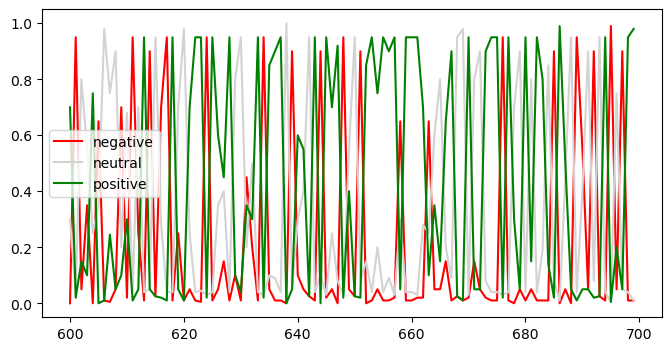

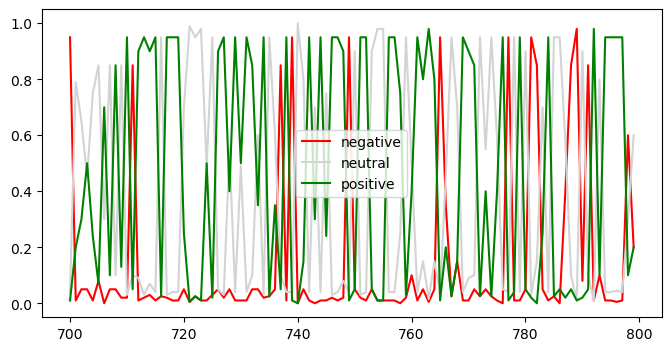

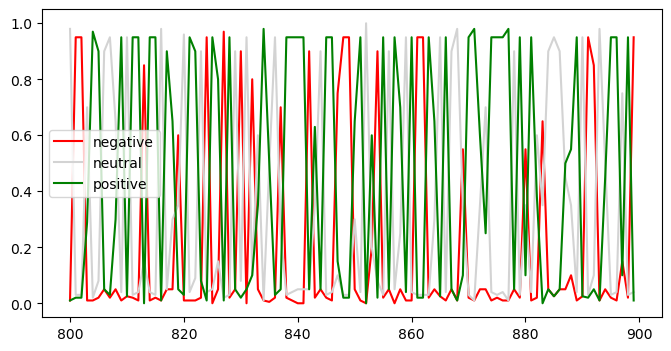

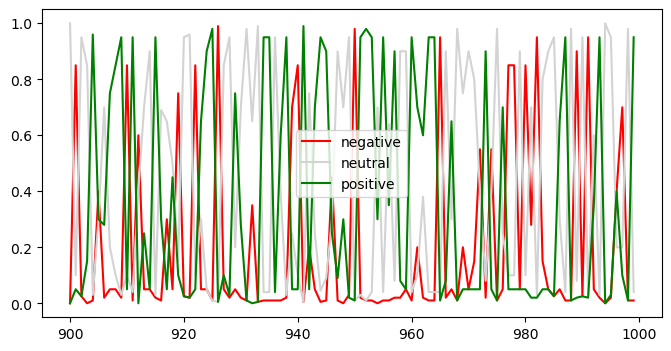

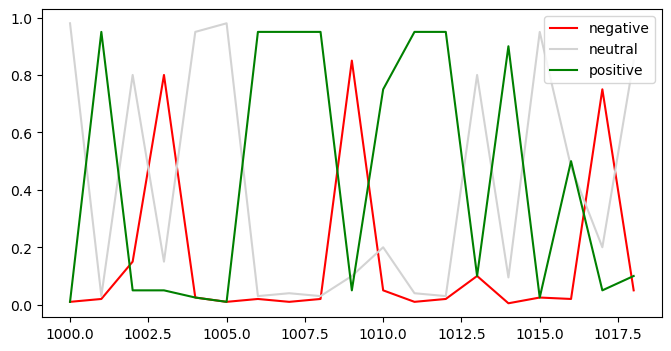

In [159]:
import matplotlib.pyplot as plt

numbers = np.arange(100,1101,100)

for n in range(len(numbers)-1):
    plt.figure(figsize=(8,4))
    plt.plot(df_sentiment['negative'][numbers[n]:numbers[n+1]], color = 'r', label = 'negative')
    plt.plot(df_sentiment['neutral'][numbers[n]:numbers[n+1]], color = 'lightgray', label = 'neutral')
    plt.plot(df_sentiment['positive'][numbers[n]:numbers[n+1]], color ='g', label = 'positive')

    plt.legend(loc='best')

# The same for all batch